## Home loan default prediction:

- Current home loan id is provided along with details pertaining to the property and the applicant information such as income, marital status.
- The problem is a binary class classificaton problem.(1/0)
- Labelencoding for encoding variables to categorical variables.
- XGBClassifier and MLP classifier were used.
- Outliers were removed using the IQR.
- Inorder to overcome imbalance in the target, SMOTE was used.
- PCA was inorder to reduce the dimensions in the datset.
- ROC_auc, Accuarcy and precision was used to evaluate the model.

In [1]:
# Importing necessary packages :-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [2]:
# Convertng a csv file to a dataframe:
data_raw = pd.read_csv('application_train.csv')
data_raw.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Shape of the entire dataset :

data_raw.shape

(307511, 122)

In [4]:
data_raw.isnull().sum()    #CHECKING FOR NAN values

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [5]:
data_raw.describe()     #DESCRIPTION OF THE ENTIRE DATASET......

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [3]:
data_raw.dropna(inplace=True) #DROPPING NAN VALUES FROM THE DATASET......
data_raw.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0


In [67]:
data_raw.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

In [8]:
from collections import Counter

In [9]:
Counter(data_raw.TARGET) # lOOKS LIKE AFTER REMOVING THE NAN VALUES, OUR LOOKS - 'IMBALANCED'

Counter({0: 8076, 1: 526})

In [10]:
import seaborn as sb   #IMPORTING SEABORN FOR 

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [5]:
data_raw.NAME_CONTRACT_TYPE = enc.fit_transform(data_raw.NAME_CONTRACT_TYPE)
data_raw.CODE_GENDER = enc.fit_transform(data_raw.CODE_GENDER)
data_raw.FLAG_OWN_CAR = enc.fit_transform(data_raw.FLAG_OWN_CAR)
data_raw.FLAG_OWN_REALTY = enc.fit_transform(data_raw.FLAG_OWN_REALTY)
data_raw.NAME_EDUCATION_TYPE = enc.fit_transform(data_raw.NAME_EDUCATION_TYPE )
data_raw.NAME_FAMILY_STATUS = enc.fit_transform(data_raw.NAME_FAMILY_STATUS)
data_raw.NAME_HOUSING_TYPE = enc.fit_transform(data_raw.NAME_HOUSING_TYPE)
data_raw.NAME_INCOME_TYPE  = enc.fit_transform(data_raw.NAME_INCOME_TYPE)
data_raw.NAME_TYPE_SUITE   = enc.fit_transform(data_raw.NAME_TYPE_SUITE)
data_raw.OCCUPATION_TYPE   = enc.fit_transform(data_raw.OCCUPATION_TYPE)
data_raw.WEEKDAY_APPR_PROCESS_START = enc.fit_transform(data_raw.WEEKDAY_APPR_PROCESS_START)
data_raw.ORGANIZATION_TYPE          = enc.fit_transform(data_raw.ORGANIZATION_TYPE )
data_raw.FONDKAPREMONT_MODE         = enc.fit_transform(data_raw.FONDKAPREMONT_MODE)
data_raw.HOUSETYPE_MODE             =enc.fit_transform(data_raw.HOUSETYPE_MODE)
data_raw.WALLSMATERIAL_MODE         =enc.fit_transform(data_raw.WALLSMATERIAL_MODE)
data_raw.EMERGENCYSTATE_MODE        =enc.fit_transform(data_raw.EMERGENCYSTATE_MODE)

In [6]:
data_raw


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,0,0,0,1,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,0,0,0,1,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,0,0,0,1,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,0,0,0,1,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [12]:
data_raw.SK_ID_CURR

71        100083
124       100145
152       100179
161       100190
255       100295
           ...  
307358    456083
307359    456084
307407    456140
307456    456195
307482    456226
Name: SK_ID_CURR, Length: 8602, dtype: int64

In [7]:
y = data_raw.TARGET

In [8]:
X = data_raw.iloc[:,1:]

[2.61955450e-03 9.05066866e-03 0.00000000e+00 8.14978566e-03
 9.87109642e-03 1.20814275e-02 1.30002079e-02 1.28308272e-02
 1.30187398e-02 8.35510578e-03 9.65312330e-03 9.34556387e-03
 1.14975915e-02 8.76337198e-03 1.21380685e-02 1.40896862e-02
 1.32547275e-02 1.48245480e-02 1.40767523e-02 1.38821948e-02
 0.00000000e+00 0.00000000e+00 8.68929534e-03 4.33352681e-04
 8.67461746e-03 6.92791156e-03 1.19891921e-02 1.08318016e-02
 8.08892819e-03 7.40630130e-03 1.31989738e-02 1.27360434e-02
 1.43785602e-03 3.53265196e-03 4.01557000e-03 3.31306797e-03
 6.14978733e-03 5.32510535e-03 1.35639453e-02 2.16486710e-02
 2.25334856e-02 2.65681658e-02 1.03921959e-02 1.14664291e-02
 1.16586306e-02 1.18240739e-02 1.17316387e-02 6.63372201e-03
 1.07802565e-02 8.43240745e-03 9.26660794e-03 1.24188634e-02
 1.07029380e-02 1.10366053e-02 9.29241135e-03 1.03845077e-02
 1.13108863e-02 1.14297840e-02 1.17342441e-02 1.21414677e-02
 1.22670431e-02 6.50471459e-03 1.07436660e-02 8.01341620e-03
 9.56475911e-03 1.291340

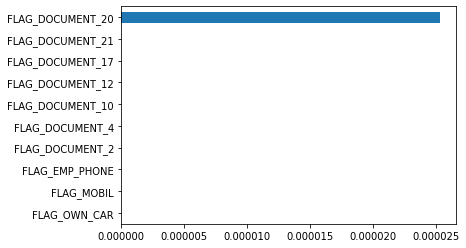

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

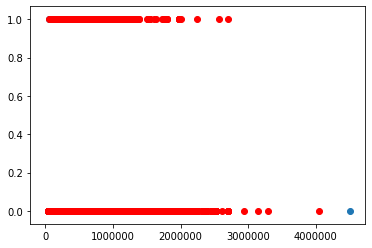

In [18]:
plt.scatter(X.AMT_INCOME_TOTAL,y)
plt.scatter(X.AMT_CREDIT,y,color='red')

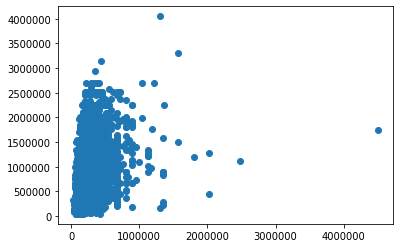

In [19]:
plt.scatter(X.AMT_INCOME_TOTAL,X.AMT_CREDIT)

In [49]:
# Correlation of Continous variables:
data_conti = data_raw.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE',
'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI'
,'TOTALAREA_MODE']]

In [52]:
data_conti.corr()


# due to high co relation coeff. observed between AMT_CREDIT and AMT_GOOD_PRICE is removed from features

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
AMT_INCOME_TOTAL,1.000000,0.348575,0.415807,0.354556,0.039831,0.211133,-0.119206,-0.028260,0.005067,-0.000738,...,0.144804,-0.007247,0.196860,0.125193,-0.022473,0.101536,0.122246,0.021797,0.112429,0.124148
AMT_CREDIT,0.348575,1.000000,0.751587,0.987994,0.034878,0.110804,-0.198152,-0.068760,-0.024419,-0.010270,...,0.059601,-0.003858,0.095669,0.071373,-0.018938,0.038887,0.052264,0.008839,0.031790,0.051258
AMT_ANNUITY,0.415807,0.751587,1.000000,0.756896,0.019474,0.142985,-0.151530,-0.058623,-0.010262,-0.013062,...,0.089481,-0.011261,0.129675,0.096311,-0.004275,0.058902,0.077653,0.026671,0.038763,0.077261
AMT_GOODS_PRICE,0.354556,0.987994,0.756896,1.000000,0.040187,0.109844,-0.198316,-0.071172,-0.020829,-0.012233,...,0.064425,-0.002188,0.103552,0.075660,-0.011549,0.044632,0.058078,0.011532,0.036299,0.056767
HOUR_APPR_PROCESS_START,0.039831,0.034878,0.019474,0.040187,1.000000,0.218602,0.032978,0.031241,-0.045795,0.007826,...,0.107978,0.006598,0.137709,0.125900,-0.018634,0.081182,0.085836,0.020280,0.052557,0.076907
REGION_POPULATION_RELATIVE,0.211133,0.110804,0.142985,0.109844,0.218602,1.000000,-0.060821,0.004597,-0.075898,0.054901,...,0.258192,-0.011927,0.315434,0.268459,-0.103609,0.156944,0.167939,0.031710,0.083922,0.160669
DAYS_BIRTH,-0.119206,-0.198152,-0.151530,-0.198316,0.032978,-0.060821,1.000000,0.325117,0.237257,0.060523,...,-0.046645,-0.027216,-0.045896,-0.034827,-0.010565,-0.027130,-0.036462,-0.002564,-0.024168,-0.033928
DAYS_EMPLOYED,-0.028260,-0.068760,-0.058623,-0.071172,0.031241,0.004597,0.325117,1.000000,0.117245,0.079649,...,0.005026,-0.032276,0.010550,0.010019,-0.008592,-0.004096,-0.007584,-0.009409,-0.007432,-0.007309
DAYS_REGISTRATION,0.005067,-0.024419,-0.010262,-0.020829,-0.045795,-0.075898,0.237257,0.117245,1.000000,-0.001295,...,0.021628,-0.045319,0.081467,0.034625,0.026119,0.034345,0.039249,0.029683,0.082555,0.053839
DAYS_ID_PUBLISH,-0.000738,-0.010270,-0.013062,-0.012233,0.007826,0.054901,0.060523,0.079649,-0.001295,1.000000,...,-0.002988,-0.010946,0.005341,0.000487,-0.026527,-0.008141,-0.008555,0.002882,-0.003990,-0.009682


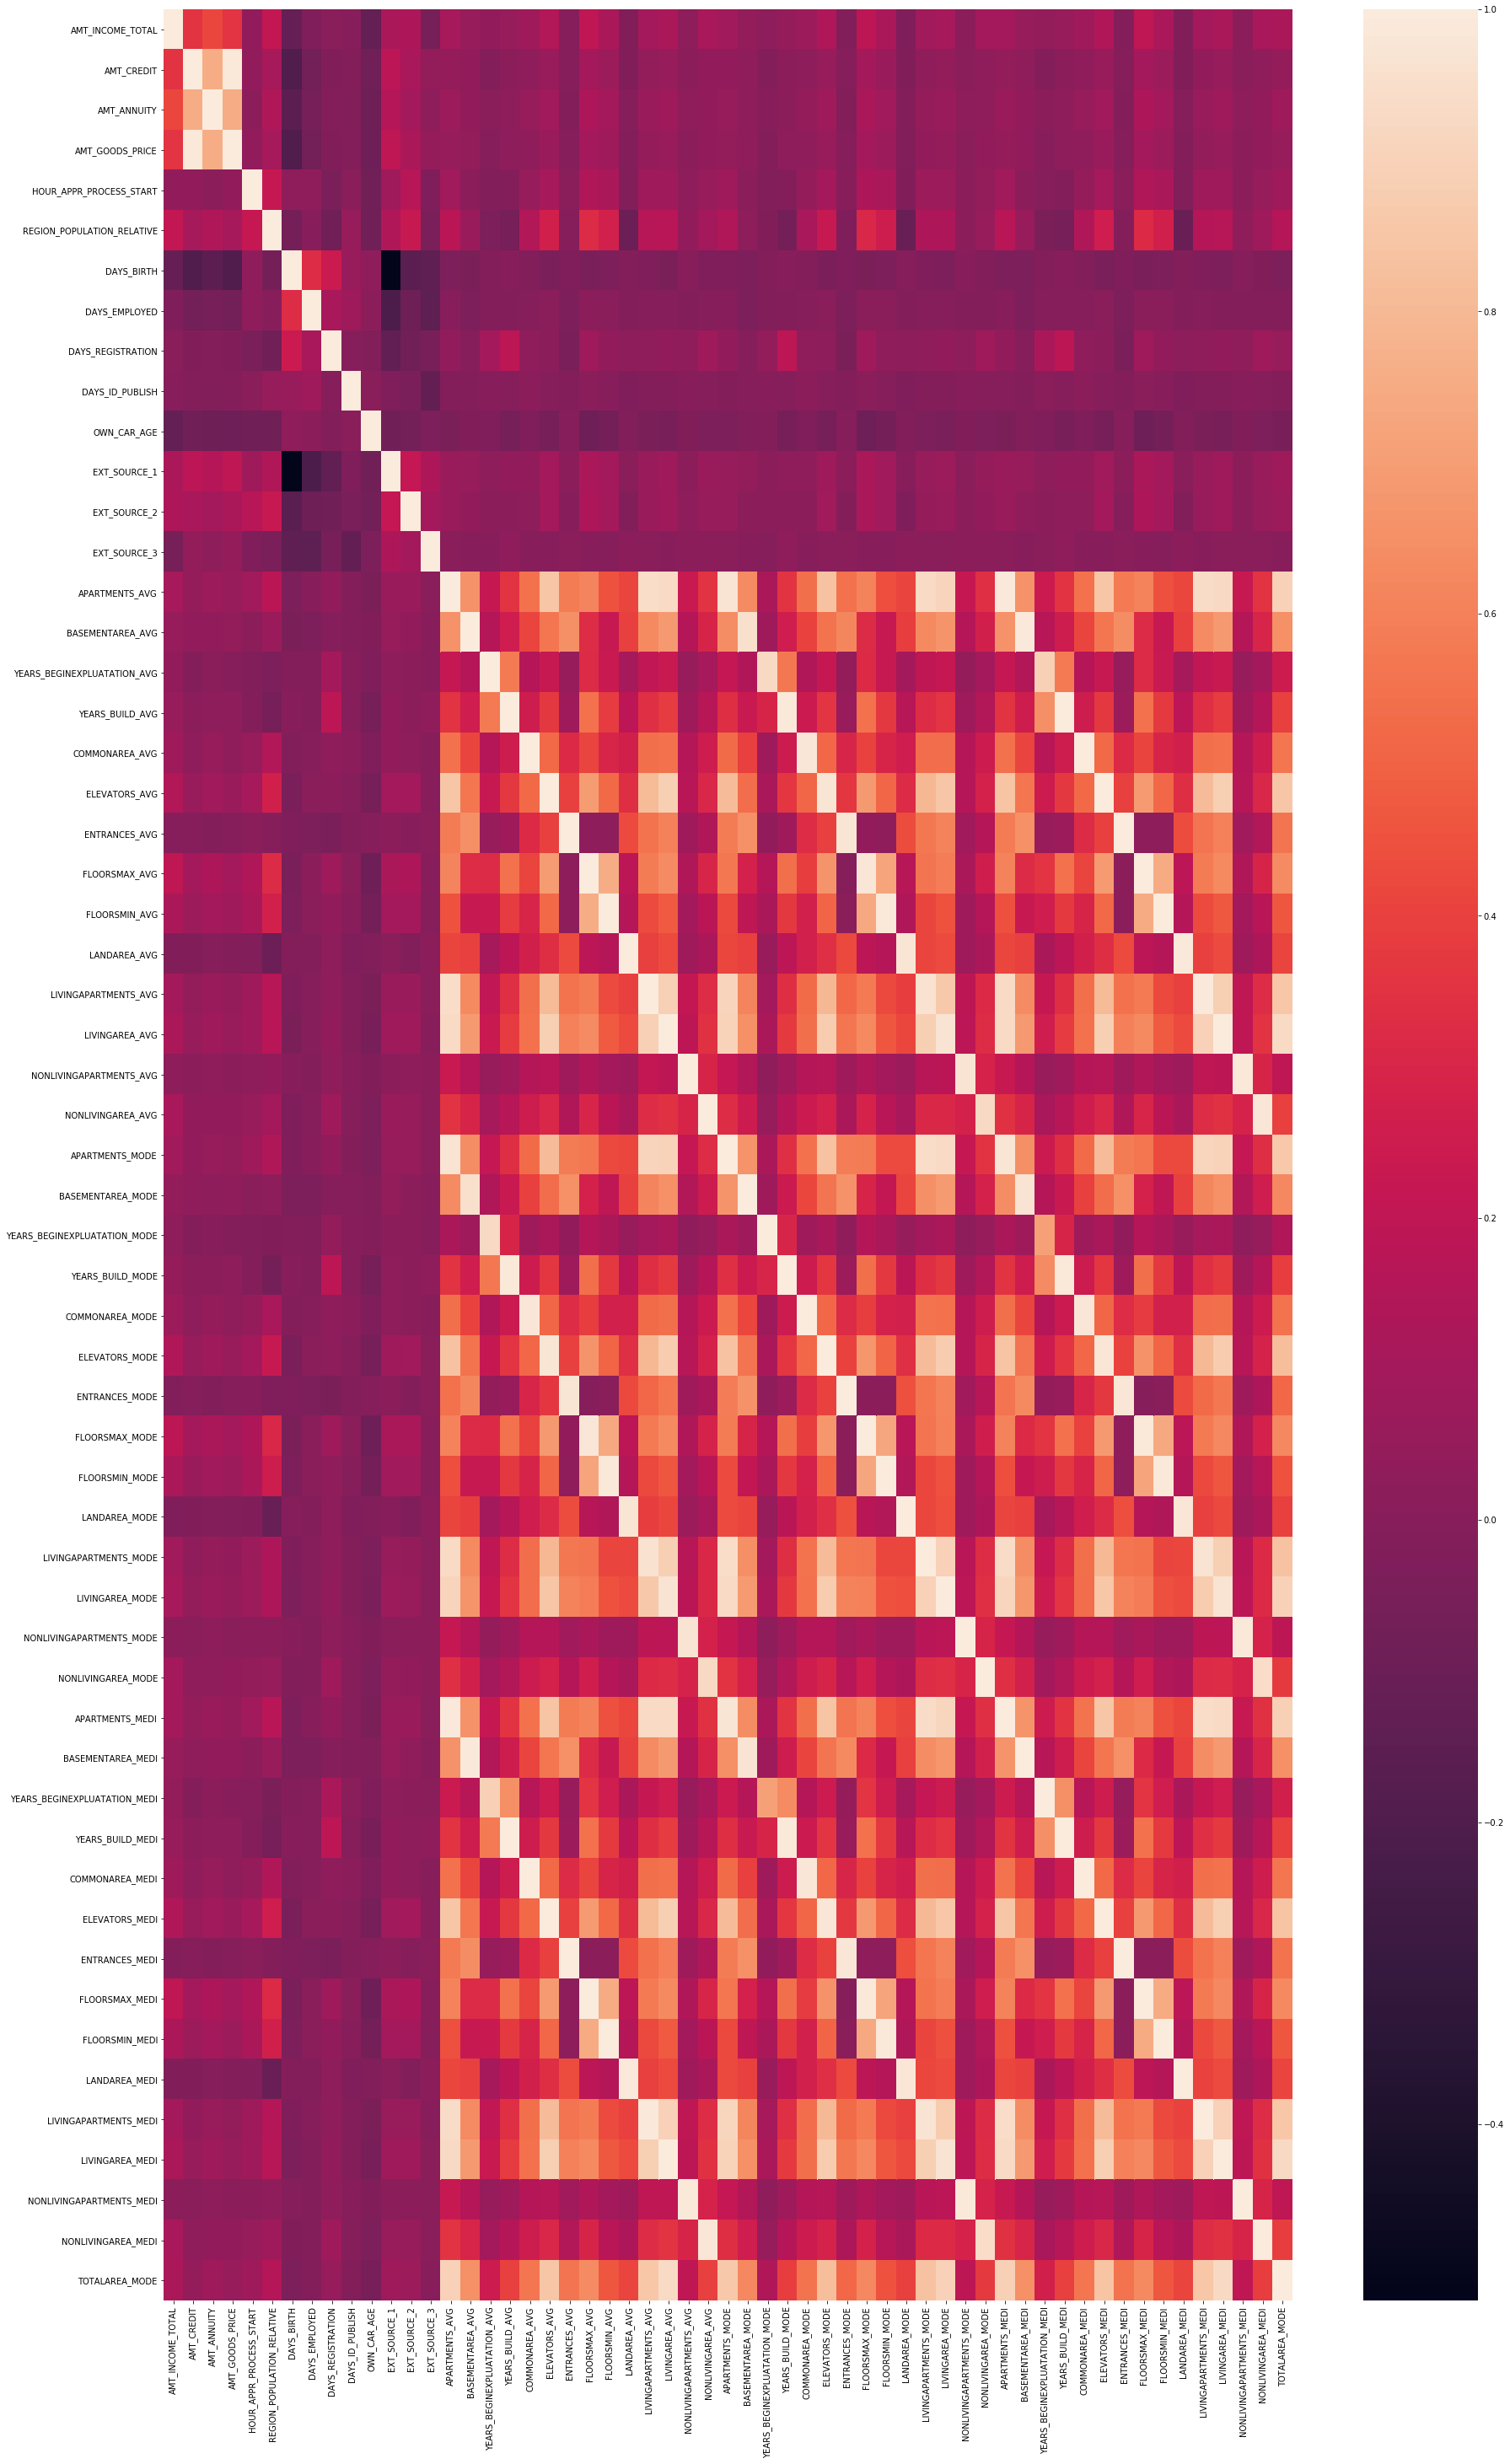

In [55]:
sb.heatmap(data_conti.corr())
rcParams['figure.figsize'] = 10,20

In [ ]:
# Finding correlation between binary variables :



In [65]:
data_bin=data_raw.loc[:,['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']]

data_bin.corr()



,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
FLAG_DOCUMENT_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_DOCUMENT_3,NaN,1.000000,NaN,-0.160589,-0.093881,-0.025655,-0.695634,-0.093881,-0.014810,-0.116077,...,-0.027467,0.024661,-0.029677,-0.010693,-0.033861,-0.050841,-0.054542,-0.029875,-0.025647,-0.025100
FLAG_DOCUMENT_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_DOCUMENT_5,NaN,-0.160589,NaN,1.000000,-0.007991,-0.002184,-0.059214,-0.007991,-0.001261,-0.009881,...,0.045717,0.006561,0.096197,0.007366,0.003542,0.008862,0.004152,-0.012330,0.005124,0.004460
FLAG_DOCUMENT_6,NaN,-0.093881,NaN,-0.007991,1.000000,-0.001277,-0.034617,-0.004672,-0.000737,-0.005776,...,0.002326,0.003835,0.028193,-0.005293,-0.008061,0.004434,0.006921,-0.004406,-0.014085,-0.016791
FLAG_DOCUMENT_7,NaN,-0.025655,NaN,-0.002184,-0.001277,1.000000,-0.009460,-0.001277,-0.000201,-0.001579,...,0.005594,0.001048,0.014439,-0.007081,-0.002203,-0.004704,-0.004394,-0.003672,0.027253,0.029269
FLAG_DOCUMENT_8,NaN,-0.695634,NaN,-0.059214,-0.034617,-0.009460,1.000000,-0.034617,-0.005461,-0.042801,...,0.010802,-0.043766,0.027322,0.022036,0.022097,0.053925,0.056849,0.017793,0.013574,0.009703
FLAG_DOCUMENT_9,NaN,-0.093881,NaN,-0.007991,-0.004672,-0.001277,-0.034617,1.000000,-0.000737,-0.005776,...,0.010700,0.003835,0.020799,0.020482,0.006630,0.011650,0.006921,0.004623,-0.009276,-0.006745
FLAG_DOCUMENT_10,NaN,-0.014810,NaN,-0.001261,-0.000737,-0.000201,-0.005461,-0.000737,1.000000,-0.000911,...,-0.005578,0.000605,0.016111,-0.004088,-0.001272,-0.002715,-0.002536,-0.002119,-0.004498,-0.004234
FLAG_DOCUMENT_11,NaN,-0.116077,NaN,-0.009881,-0.005776,-0.001579,-0.042801,-0.005776,-0.000911,1.000000,...,0.159970,0.004742,0.039354,-0.011142,0.037676,0.013819,-0.001232,0.049272,0.031031,0.007542


KeyError: 'Figure.Figsize is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

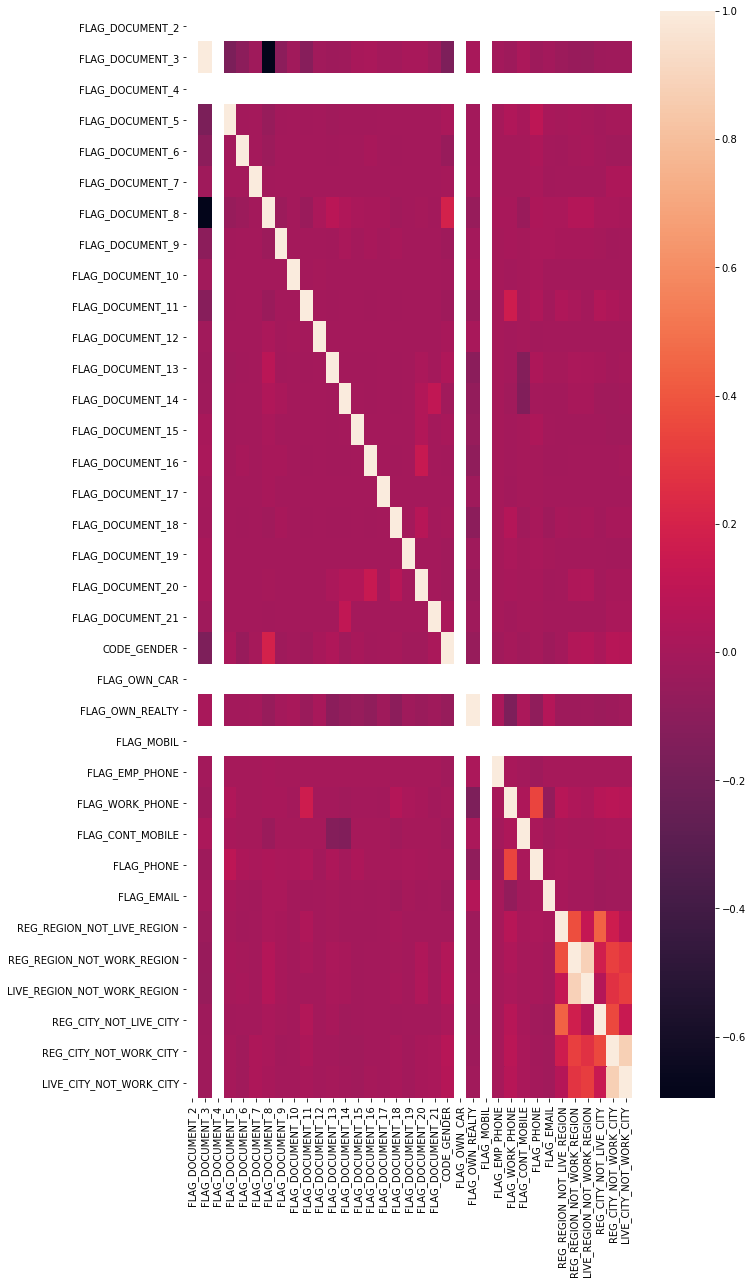

In [57]:
sb.heatmap(data_bin.corr())
rcParams['Figure.Figsize'] = 6,8

In [68]:
# Correlation of categorical variables :

data_cat = data_raw.loc[:,['NAME_CONTRACT_TYPE','CNT_CHILDREN','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]
data_cat.corr()

,NAME_CONTRACT_TYPE,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_CONTRACT_TYPE,1.000000,0.020854,0.021342,-0.002202,-0.067004,0.036147,-0.011407,-0.002628,0.006318,-0.022139,...,-0.014265,-0.012785,-0.013831,-0.021326,-0.007084,-0.013953,-0.017467,-0.019016,-0.022528,-0.063929
CNT_CHILDREN,0.020854,1.000000,-0.021191,0.037572,0.004748,-0.157947,-0.008404,-0.014792,0.906702,0.015053,...,0.008031,-0.019913,0.007668,-0.018192,-0.009919,-0.002712,-0.001043,-0.023803,-0.022028,-0.035499
NAME_TYPE_SUITE,0.021342,-0.021191,1.000000,0.001812,-0.028339,0.078014,0.043537,0.007185,-0.052702,-0.003694,...,-0.017755,-0.025944,-0.016663,-0.019216,0.014047,0.001630,-0.017943,0.000677,-0.002124,0.002579
NAME_INCOME_TYPE,-0.002202,0.037572,0.001812,1.000000,0.145348,-0.013157,0.031161,-0.005278,0.035909,0.202852,...,0.031604,0.014988,0.031892,0.021751,-0.016045,-0.019935,-0.014782,-0.050223,-0.005997,0.028820
NAME_EDUCATION_TYPE,-0.067004,0.004748,-0.028339,0.145348,1.000000,-0.052260,0.029669,0.110553,0.025434,0.047546,...,0.050319,0.032829,0.050800,0.038468,-0.007889,-0.009458,-0.010792,-0.014386,0.013530,0.086553
NAME_FAMILY_STATUS,0.036147,-0.157947,0.078014,-0.013157,-0.052260,1.000000,0.077732,0.007403,-0.517396,-0.025534,...,-0.012298,-0.016411,-0.011322,-0.015196,-0.013719,0.018789,0.017122,0.013940,0.001029,-0.017715
NAME_HOUSING_TYPE,-0.011407,-0.008404,0.043537,0.031161,0.029669,0.077732,1.000000,0.001646,-0.046253,0.015135,...,-0.017193,-0.003317,-0.016768,0.003704,-0.007480,0.012313,-0.009621,-0.013990,-0.007091,0.002062
OCCUPATION_TYPE,-0.002628,-0.014792,0.007185,-0.005278,0.110553,0.007403,0.001646,1.000000,-0.018587,0.031881,...,0.016498,0.003609,0.016561,-0.005202,-0.009362,0.003444,0.019593,-0.006574,-0.003252,0.031794
CNT_FAM_MEMBERS,0.006318,0.906702,-0.052702,0.035909,0.025434,-0.517396,-0.046253,-0.018587,1.000000,0.024247,...,0.013014,-0.010916,0.012426,-0.010233,-0.001718,-0.009717,-0.004693,-0.023726,-0.017122,-0.024784
REGION_RATING_CLIENT,-0.022139,0.015053,-0.003694,0.202852,0.047546,-0.025534,0.015135,0.031881,0.024247,1.000000,...,0.068666,0.041983,0.068418,0.054156,-0.011263,-0.011292,-0.013445,-0.064634,0.027296,0.048630


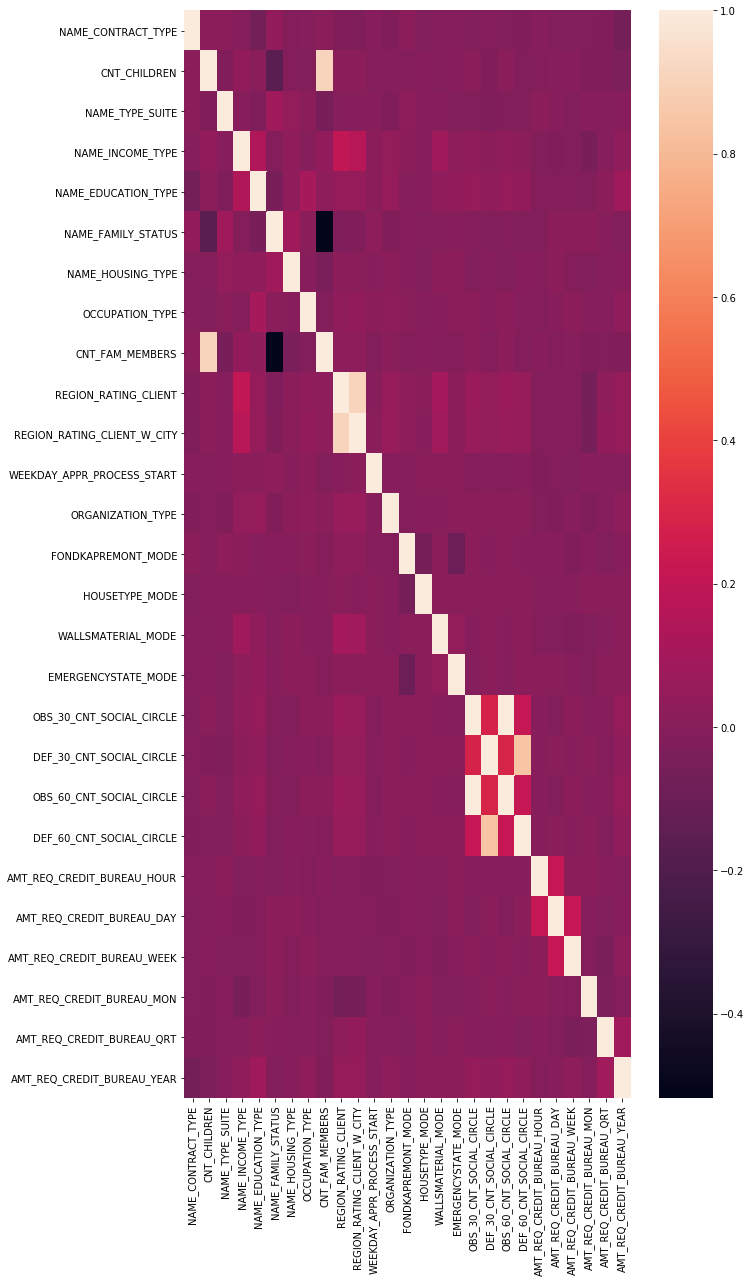

In [71]:
sb.heatmap(data_cat.corr())
rcParams['figure.figsize'] = 6,6

In [127]:
# Data of continous variables cleaned, correlation has been done and features selected

data_new_conti = data_raw.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','HOUR_APPR_PROCESS_START','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE',
'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG']]

data_new_bin = data_raw.loc[:,['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
'CODE_GENDER','FLAG_OWN_REALTY','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY']]

data_new_cat = data_raw.loc[:,['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]


Description of conti:        AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  HOUR_APPR_PROCESS_START  \
count      8.602000e+03  8.602000e+03    8602.000000              8602.000000   
mean       2.228724e+05  6.999987e+05   31558.948326                12.203325   
std        1.414204e+05  4.649119e+05   16587.353415                 3.352579   
min        3.375000e+04  4.500000e+04    2317.500000                 1.000000   
25%        1.350000e+05  3.150000e+05   19548.000000                10.000000   
50%        1.935000e+05  5.850000e+05   29209.500000                12.000000   
75%        2.700000e+05  9.581445e+05   40320.000000                15.000000   
max        4.500000e+06  4.050000e+06  225000.000000                23.000000   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                 8602.000000   8602.000000    8602.000000   
mean                     0.023543 -14189.009416   -2299.091374   
std                      0.016361   3259.202657   

{'whiskers': [<matplotlib.lines.Line2D at 0xc8b368e908>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0xc8cfe7d6c8>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0xc8cf402f08>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0xc8d17228c8>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0xc8d171f808>,
  ...],
 'means': []}

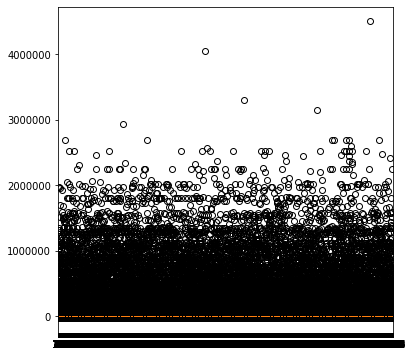

In [84]:
# E.D.A for continous,categorical and binary variables :-

print('Description of conti:', 
      
      data_new_conti.describe())

plt.boxplot(data_new_conti.)

{'whiskers': [<matplotlib.lines.Line2D at 0xc89b9ac7c8>,
 'caps': [<matplotlib.lines.Line2D at 0xc89b9acfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0xc89bb1fcc8>],
 'medians': [<matplotlib.lines.Line2D at 0xc89bcefb48>],
 'fliers': [<matplotlib.lines.Line2D at 0xc89bcefc48>],
 'means': []}

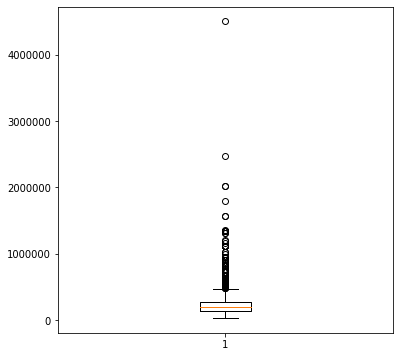

In [85]:
plt.boxplot(data_new_conti.AMT_INCOME_TOTAL)

In [82]:
print('Description of binary:', 
      
      data_new_bin.describe())

Description of binary:        FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
count           8602.0      8602.000000      8602.000000      8602.000000   
mean               0.0         0.653569         0.013485         0.004650   
std                0.0         0.475860         0.115347         0.068037   
min                0.0         0.000000         0.000000         0.000000   
25%                0.0         0.000000         0.000000         0.000000   
50%                0.0         1.000000         0.000000         0.000000   
75%                0.0         1.000000         0.000000         0.000000   
max                0.0         1.000000         1.000000         1.000000   

       FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
count      8602.000000      8602.000000      8602.000000       8602.000000   
mean          0.000349         0.204139         0.004650          0.000116   
std           0.018673         0.403094         0

In [83]:
print('Description of categorical:', 
      
      data_new_cat.describe())

Description of categorical:        NAME_CONTRACT_TYPE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
count         8602.000000      8602.000000       8602.000000   
mean             0.109509         5.328877          1.257382   
std              0.312295         1.660619          0.922289   
min              0.000000         0.000000          0.000000   
25%              0.000000         6.000000          0.000000   
50%              0.000000         6.000000          2.000000   
75%              0.000000         6.000000          2.000000   
max              1.000000         6.000000          2.000000   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count          8602.000000         8602.000000        8602.000000   
mean              2.673332            1.274122           1.297024   
std               1.457297            0.842264           0.972479   
min               0.000000            0.000000           0.000000   
25%               1.000000            1.000000    

In [132]:
# SCALING THE CONTINOUS VARIABLES :

from sklearn.preprocessing import scale
data_new_scaled_conti = scale(data_new_conti)
data_new_continous = pd.DataFrame(data_new_scaled_conti,columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','HOUR_APPR_PROCESS_START','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE',
'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG'],index=data_new_bin.index)
data_new_continous

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG
71,-0.844145,-0.271831,-0.429506,1.729120,-0.848743,-0.373423,0.677444,1.277199,-0.791729,0.868820,...,0.254446,0.397862,0.800571,-0.341090,-1.227985,0.570058,0.815348,-0.820276,-0.186434,-0.406343
124,-0.144064,-0.944908,-0.890456,-0.358946,-0.286831,-0.642216,-0.999447,1.140587,0.977676,-0.259950,...,-0.183092,-0.335219,-0.012203,-0.626699,0.523273,-0.558888,-0.212260,-0.298175,-0.186434,-0.406343
152,-0.144064,-0.053774,1.312555,0.237644,0.475933,0.863454,-0.005733,1.329442,0.637913,-0.582456,...,0.867000,1.436393,3.946286,3.657432,0.873728,4.523400,1.585900,2.581146,4.255514,11.465880
161,-0.430461,-0.938538,-0.408615,1.132530,-0.056089,0.066587,-1.046147,1.237286,-1.024614,-0.663083,...,0.473215,0.764402,-0.622114,2.229388,0.873728,1.417106,1.585900,4.079349,-0.186434,-0.148284
255,0.015045,0.686635,-0.031770,0.535940,2.992953,0.869284,0.817065,1.279146,-0.163662,-0.179324,...,0.655523,1.069853,5.545489,2.229388,0.172819,1.982256,1.585900,-0.553849,-0.031036,-0.291138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,-0.780501,-0.728215,-0.934950,-0.955536,0.099105,-0.250686,0.574896,0.801816,0.337075,-0.179324,...,1.049307,1.680753,2.041469,-0.626699,-0.001901,-0.558888,-1.239252,0.864306,-0.186434,0.312534
307359,-0.875967,-0.053774,-0.581980,-0.955536,-0.201502,0.055848,0.133887,0.610690,1.186812,0.223808,...,0.181523,0.275682,-0.033280,-0.055481,-0.877530,0.570058,-1.496308,0.883422,-0.107726,-0.387910
307407,0.269620,0.024642,0.971523,1.729120,-0.286831,0.853636,0.316838,-1.626042,0.034917,-0.582456,...,0.327369,0.520042,-0.511460,-0.626699,-0.177636,-0.558888,-0.212260,-0.598054,-0.186434,-0.406343
307456,-0.907789,-0.924957,-0.993824,-0.358946,0.312977,-1.858535,-1.517968,-0.390372,-0.533113,-0.501830,...,-0.431030,-0.762849,-0.601037,-0.626699,-1.227985,-1.405936,-0.982812,-0.509644,-0.186434,-0.406343


In [144]:
# Summing up cleaned 

data_cleaned = pd.concat([data_new_continous,data_new_bin,data_new_cat],axis=1)
data_cleaned

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,-0.844145,-0.271831,-0.429506,1.729120,-0.848743,-0.373423,0.677444,1.277199,-0.791729,0.868820,...,5,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
124,-0.144064,-0.944908,-0.890456,-0.358946,-0.286831,-0.642216,-0.999447,1.140587,0.977676,-0.259950,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
152,-0.144064,-0.053774,1.312555,0.237644,0.475933,0.863454,-0.005733,1.329442,0.637913,-0.582456,...,2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
161,-0.430461,-0.938538,-0.408615,1.132530,-0.056089,0.066587,-1.046147,1.237286,-1.024614,-0.663083,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
255,0.015045,0.686635,-0.031770,0.535940,2.992953,0.869284,0.817065,1.279146,-0.163662,-0.179324,...,4,0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,-0.780501,-0.728215,-0.934950,-0.955536,0.099105,-0.250686,0.574896,0.801816,0.337075,-0.179324,...,5,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
307359,-0.875967,-0.053774,-0.581980,-0.955536,-0.201502,0.055848,0.133887,0.610690,1.186812,0.223808,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307407,0.269620,0.024642,0.971523,1.729120,-0.286831,0.853636,0.316838,-1.626042,0.034917,-0.582456,...,4,0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
307456,-0.907789,-0.924957,-0.993824,-0.358946,0.312977,-1.858535,-1.517968,-0.390372,-0.533113,-0.501830,...,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [136]:
data_cleaned.isnull().sum()

AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
HOUR_APPR_PROCESS_START       0
REGION_POPULATION_RELATIVE    0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 78, dtype: int64

In [137]:
X_new  = data_cleaned

[2.15503459e-02 2.24627094e-02 2.24806007e-02 2.31859553e-02
 2.11308057e-02 2.57634597e-02 2.29930985e-02 2.46762318e-02
 2.35612219e-02 2.35683048e-02 3.24464272e-02 3.53201797e-02
 3.95740449e-02 2.13487494e-02 2.28038606e-02 2.23655276e-02
 2.30316955e-02 2.28408632e-02 1.59365349e-02 2.12404093e-02
 1.87272159e-02 2.01959596e-02 2.30586540e-02 1.97658463e-02
 1.95937205e-02 0.00000000e+00 7.63250276e-03 7.88942803e-04
 6.31860764e-04 8.48180797e-04 6.73935692e-03 1.79813065e-03
 0.00000000e+00 1.02206039e-03 0.00000000e+00 6.01793442e-04
 9.40144595e-04 1.85790941e-03 5.98000420e-04 1.75496911e-05
 1.38257690e-03 9.19606822e-04 7.36350676e-07 0.00000000e+00
 1.20082856e-02 1.23550365e-02 0.00000000e+00 1.17925367e-02
 4.52723294e-04 1.29183957e-02 1.01461727e-02 2.20950288e-03
 6.05718399e-03 5.13465239e-03 9.88181152e-03 3.86661789e-03
 1.32366561e-02 1.45836844e-02 1.25339741e-02 1.84346407e-02
 1.24372371e-02 2.19108762e-02 1.85809412e-02 1.38534282e-02
 2.21168129e-02 2.192646

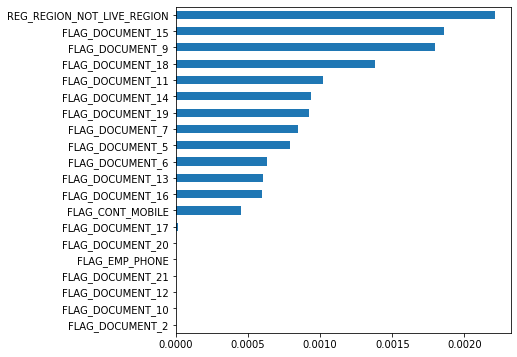

In [139]:
# FEATURE SELECTION/ELEMINATION USING EXTERNAL TREES CLASSIFIER


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_new,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_new.columns)
feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

# FROM THE FEATURES IMPORTANCE, WE FOUND LEAST 20 CONTRIBUTING VARIABLES, AND ELEMINATED FROM OUR LIST OF VARIABLES.... 




In [146]:
data_cleaned.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
'FLAG_EMP_PHONE','FLAG_CONT_MOBILE','REG_REGION_NOT_LIVE_REGION'],inplace=True,axis=1)


In [151]:
X_new

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,-0.844145,-0.271831,-0.429506,1.729120,-0.848743,-0.373423,0.677444,1.277199,-0.791729,0.868820,...,5,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
124,-0.144064,-0.944908,-0.890456,-0.358946,-0.286831,-0.642216,-0.999447,1.140587,0.977676,-0.259950,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
152,-0.144064,-0.053774,1.312555,0.237644,0.475933,0.863454,-0.005733,1.329442,0.637913,-0.582456,...,2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
161,-0.430461,-0.938538,-0.408615,1.132530,-0.056089,0.066587,-1.046147,1.237286,-1.024614,-0.663083,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
255,0.015045,0.686635,-0.031770,0.535940,2.992953,0.869284,0.817065,1.279146,-0.163662,-0.179324,...,4,0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,-0.780501,-0.728215,-0.934950,-0.955536,0.099105,-0.250686,0.574896,0.801816,0.337075,-0.179324,...,5,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
307359,-0.875967,-0.053774,-0.581980,-0.955536,-0.201502,0.055848,0.133887,0.610690,1.186812,0.223808,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307407,0.269620,0.024642,0.971523,1.729120,-0.286831,0.853636,0.316838,-1.626042,0.034917,-0.582456,...,4,0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
307456,-0.907789,-0.924957,-0.993824,-0.358946,0.312977,-1.858535,-1.517968,-0.390372,-0.533113,-0.501830,...,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [147]:
data_cleaned.shape

(8602, 58)

In [154]:
!pip install xgboost
!pip install imblearn

In [161]:
y
Counter(y)

Counter({0: 8076, 1: 526})

In [155]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from imblearn.over_sampling import SMOTE

In [150]:
from sklearn.model_selection import train_test_split

In [163]:
X_new_train,X_new_test,y_train,y_test = train_test_split(X_new,y,random_state=10,test_size=0.3)

In [164]:
y_train

295167    0
271818    0
125021    0
92859     0
26151     0
         ..
172894    0
262282    0
48151     0
262348    0
46466     0
Name: TARGET, Length: 6021, dtype: int64

In [165]:
# COMPENSATING FOR IMBALANCE USING OVERSAMPLING - SMOTE

smote = SMOTE()
X_new_train_smote,y_train_smote = smote.fit_sample(X_new_train,y_train)

In [167]:
print('y after smote:',Counter(y_train_smote))
print('y before smote:',Counter(y_train))

y after smote: Counter({0: 5633, 1: 5633})
y before smote: Counter({0: 5633, 1: 388})


In [239]:
model = XGBClassifier(learning_rate=0.1,n_estimators=25,max_depth=1,random_state=15)
model.fit(X_new_train_smote,y_train_smote)
y_predict = model.predict(X_new_test)

In [240]:
print('accuracy score:',accuracy_score(y_test,y_predict))
print('recall score:',recall_score(y_test,y_predict))
print('precision score:',precision_score(y_test,y_predict))

accuracy score: 0.6966292134831461
recall score: 0.5652173913043478
precision score: 0.09737827715355805


In [202]:
from sklearn.metrics import roc_curve,roc_auc_score

In [241]:
# ROC SCORE AND ROC_AUC_CURVE:

tpr,fpr,threshold = roc_curve(y_test,model.predict_proba(X_new_test)[:,1])

In [246]:
print(tpr)
print(fpr)
print(threshold)

[0.         0.02898551 0.04347826 ... 1.         1.         1.        ]
[0.         0.00450266 0.00859599 ... 0.99918133 0.99959067 1.        ]
[1.6507291  0.65072906 0.63260865 0.6318579  0.6312939  0.63057184
 0.6304779  0.6190288  0.61420375 0.61334014 0.61276525 0.6120292
 0.61199874 0.61193347 0.6112622  0.61116636 0.6106861  0.6105902
 0.60722023 0.607124   0.6046246  0.6002741  0.599499   0.5953667
 0.5945886  0.59427065 0.5940042  0.5932562  0.59315884 0.5931254
 0.5909137  0.5904894  0.5895776  0.588567   0.5882708  0.5881731
 0.5873907  0.58680314 0.5856354  0.5848517  0.5836651  0.5834117
 0.5762941  0.5754558  0.5751336  0.57486355 0.5743444  0.5740742
 0.574007   0.57321715 0.5714954  0.57079214 0.5705116  0.57031214
 0.5699176  0.56945735 0.5691574  0.56905854 0.568564   0.56826395
 0.56816494 0.5679694  0.5675702  0.5655951  0.56413805 0.5619672
 0.56122863 0.5605075  0.5601662  0.55638874 0.55587083 0.55554605
 0.55497134 0.55469835 0.5543726  0.55357474 0.5535068  0.55

In [247]:
roc_auc_score(y_test,model.predict_proba(X_new_test)[:,1])

0.6858430179097925

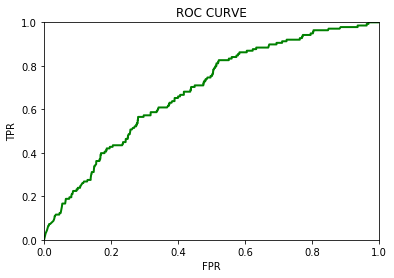

In [248]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_new_test)[:,1],drop_intermediate=False)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,tpr,color='green',lw=2)
plt.show()

In [243]:
pd.crosstab(y_test,y_predict)

col_0,0,1
TARGET,,
0,1720,723
1,60,78


In [249]:
from sklearn.neural_network import MLPClassifier

In [253]:
model_neural = MLPClassifier(hidden_layer_sizes=(100,50,50),random_state = 10)
model_neural.fit(X_new_train_smote,y_train_smote)
y_predict_neural = model_neural.predict(X_new_test)


In [254]:
pd.crosstab(y_test,y_predict_neural)

col_0,0,1
TARGET,,
0,2290,153
1,121,17
